In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## KNN K-鄰近法
手寫資料分類

In [3]:
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt

###  import data

In [4]:
digits = load_digits()

In [8]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

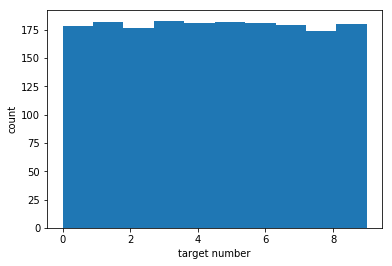

In [10]:
_ = plt.hist(digits.target)
_ =plt.xlabel("target number")
_ = plt.ylabel("count")
plt.show()

觀察: 資料很平均分配

### 繪製手寫圖片

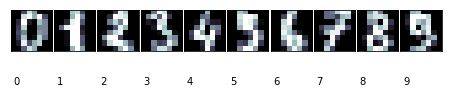

In [37]:
def print_digits(images,y,max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n :
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)

### Training Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [101]:
X = digits.data
y = digits.target
z = digits.images

In [102]:
X_train, X_test, y_train, y_test, Z_train, Z_test = train_test_split(X, y, z, test_size = 0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

### Evaluation

In [84]:
y_pred = knn.predict(X_test)

In [51]:
print(knn.score(X_train, y_train)) #Training data accuracy:
print(knn.score(X_test,y_test)) #Testing data accuracy: 


0.990257480863
0.983333333333
0.984475696231


In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import  KFold
from scipy.stats import sem

In [82]:
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv, scoring = "accuracy")
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores)))


In [94]:
evaluate_cross_validation(knn, X_test, y_test, 5) # need some time!

[ 0.93055556  0.95833333  0.95833333  0.95833333  0.90277778]
Mean score: 0.942 (+/-0.011)


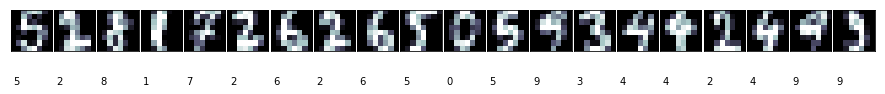

In [105]:
print_digits(Z_test, y_pred, max_n=20)